In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels
import statsmodels.api as sm
import sklearn
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data set & Understanding the Basics

In [3]:
## Read the data 
hd = pd.read_csv("train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
hd.shape

(1460, 81)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking null values
hd.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
hd.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#check Missing values of columns
hd.isnull().sum()[hd.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# Considering 10% as a limit and dropping the column having more then the Limit
round(hd.isnull().sum()/len(hd.index),2)[round(hd.isnull().sum()/len(hd.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [10]:
#Dropping the column with higher null values
hd = hd.drop(['Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'PoolQC', 'Id','LotFrontage' ], axis = 'columns')

In [11]:
#Now keeping the limit between 0-10%  for missing value 
round(hd.isnull().sum()/len(hd.index),2)[round(hd.isnull().sum()/len(hd.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [12]:
hd['YearBuilt_Old'] = hd.YearBuilt.max()-hd.YearBuilt
hd['YearRemodAdd_Old'] = hd.YearRemodAdd.max()-hd.YearRemodAdd
hd['GarageYrBlt_Old'] = hd.GarageYrBlt.max()-hd.GarageYrBlt
hd['YrSold_Old'] = hd.YrSold.max()-hd.YrSold
hd[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1088,2004,2004,2004.0,2006,6,6,6.0,4
402,1940,1997,1940.0,2008,70,13,70.0,2
903,2006,2006,2006.0,2006,4,4,4.0,4
1438,1957,1996,1957.0,2010,53,14,53.0,0
1215,1966,1966,1966.0,2007,44,44,44.0,3
837,1973,1973,1973.0,2008,37,37,37.0,2
136,1967,1967,1967.0,2007,43,43,43.0,3
1400,1929,1950,1929.0,2008,81,60,81.0,2
1325,1922,1950,NaN,2008,88,60,NaN,2
208,1988,1989,1988.0,2007,22,21,22.0,3


In [13]:
# Now we will Drop the original Year column 
hd = hd.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [14]:
# Now we see GarageYrBlt has -1 values for the houses which do not have a garage 
hd.MasVnrType.fillna('None',inplace=True)
hd.MasVnrArea.fillna(hd.MasVnrArea.mean(),inplace=True)
hd.BsmtQual.fillna('TA',inplace=True)
hd.BsmtCond.fillna('TA',inplace=True)
hd.BsmtExposure.fillna('No',inplace=True)
hd.BsmtFinType1.fillna('Unf',inplace=True)
hd.BsmtFinType2.fillna('Unf',inplace=True)
hd.GarageType.fillna('Attchd',inplace=True)
hd.GarageYrBlt_Old.fillna(-1,inplace=True)
hd.GarageFinish.fillna('Unf',inplace=True)
hd.GarageQual.fillna('TA',inplace=True)
hd.GarageCond.fillna('TA',inplace=True)

In [15]:
#Street' & 'Utilities' has the lowest valrience therefore dropping these columns
hd.Street.value_counts()
hd.Utilities.value_counts()
hd = hd.drop(['Street', 'Utilities'], axis='columns')

In [16]:
hd[list(hd.dtypes[hd.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Plotting Graphs for doing EDA

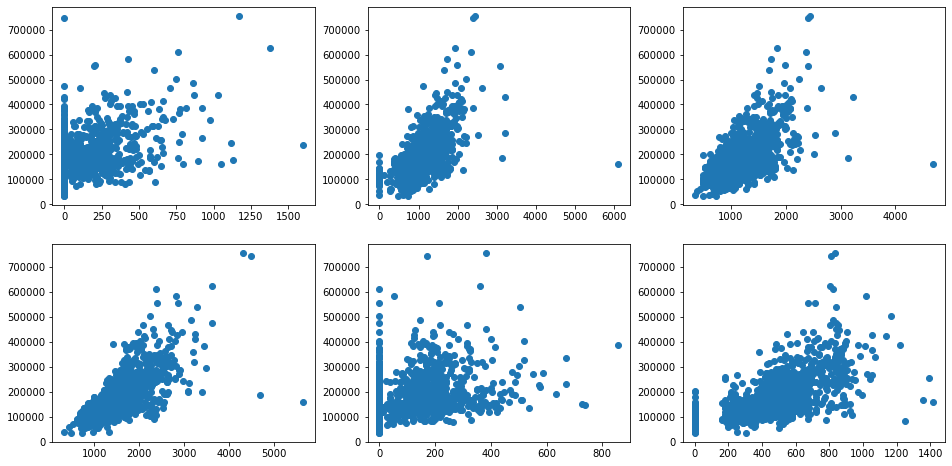

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(hd.MasVnrArea,hd.SalePrice)
plt.subplot(2,3,2)
plt.scatter(hd.TotalBsmtSF,hd.SalePrice)
plt.subplot(2,3,3)
plt.scatter(hd['1stFlrSF'],hd.SalePrice)
plt.subplot(2,3,4)
plt.scatter(hd['GrLivArea'],hd.SalePrice)
plt.subplot(2,3,6)
plt.scatter(hd['GarageArea'],hd.SalePrice)
plt.subplot(2,3,5)
plt.scatter(hd['WoodDeckSF'],hd.SalePrice)

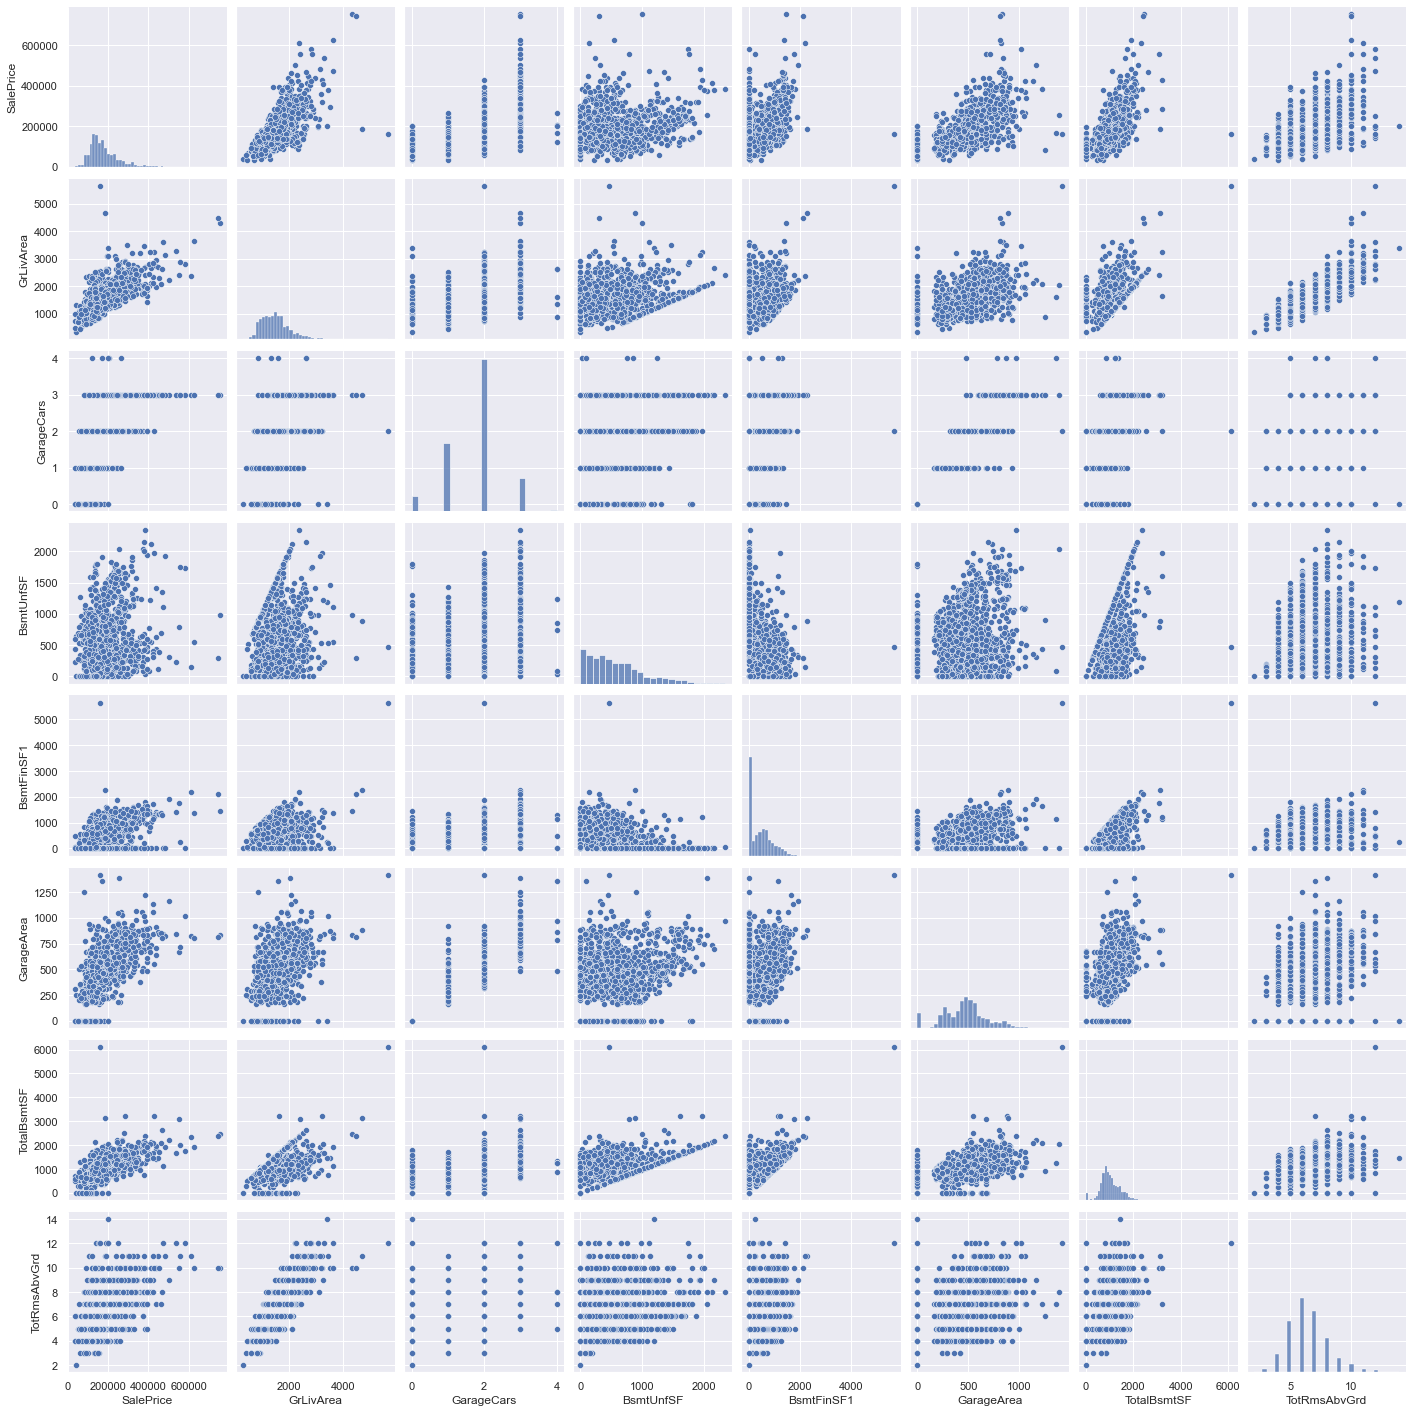

In [18]:
#pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(hd[cols], size = 2.5)
plt.show()

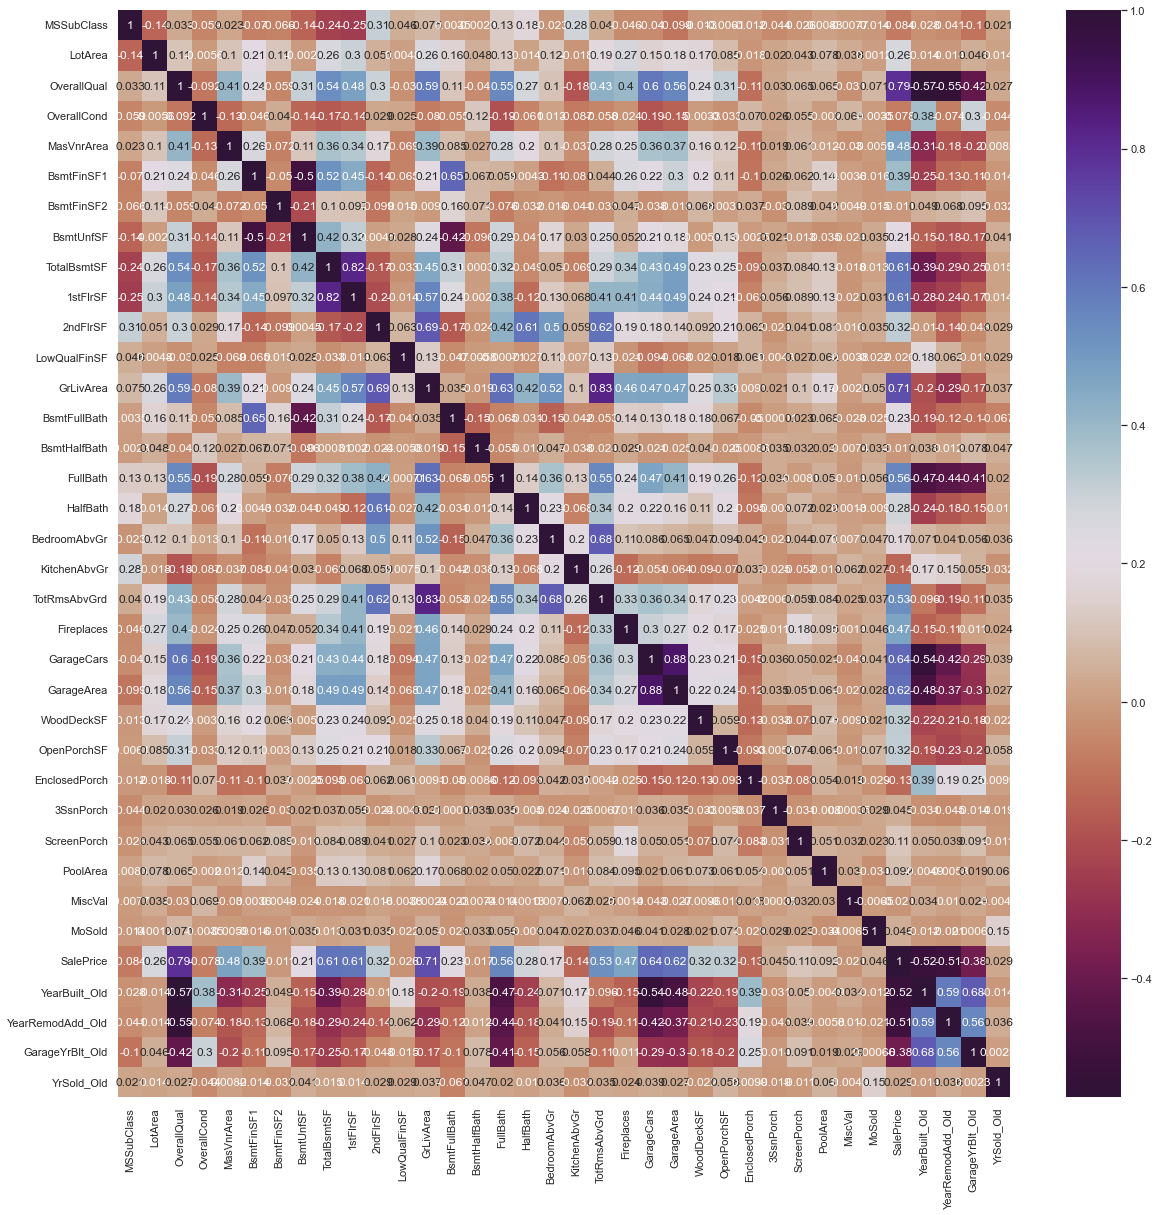

In [19]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(hd[list(hd.dtypes[hd.dtypes!='object'].index)].corr(),cmap='twilight_shifted_r',annot=True)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

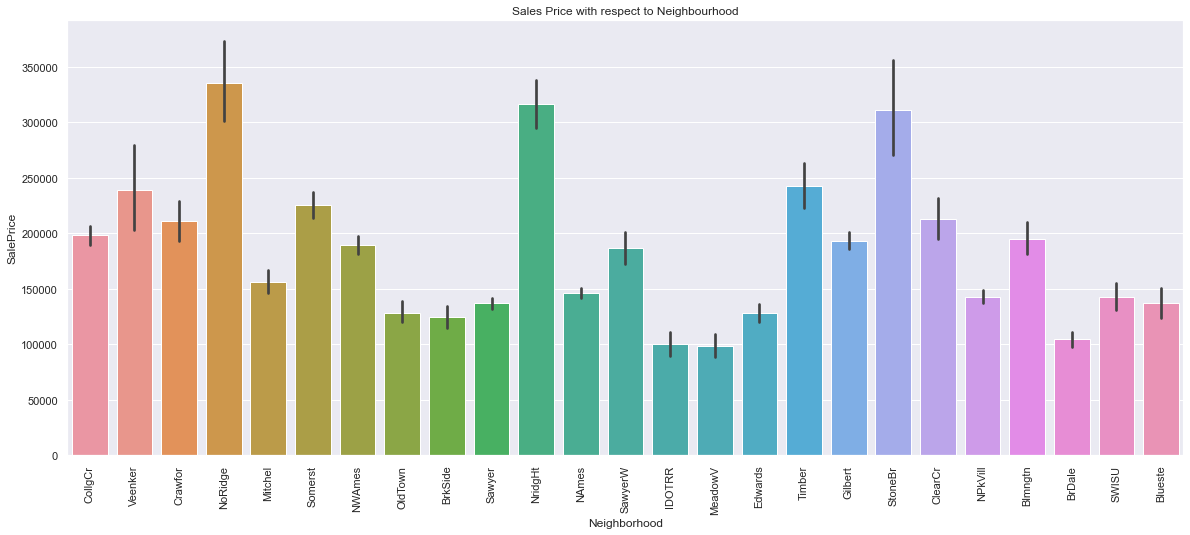

In [20]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= hd)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

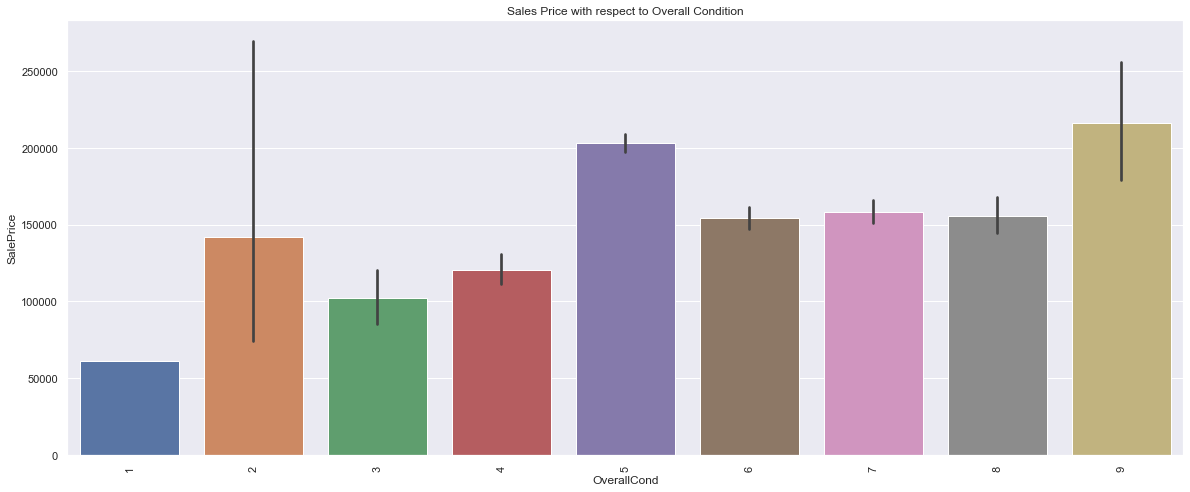

In [21]:
#plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= hd)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

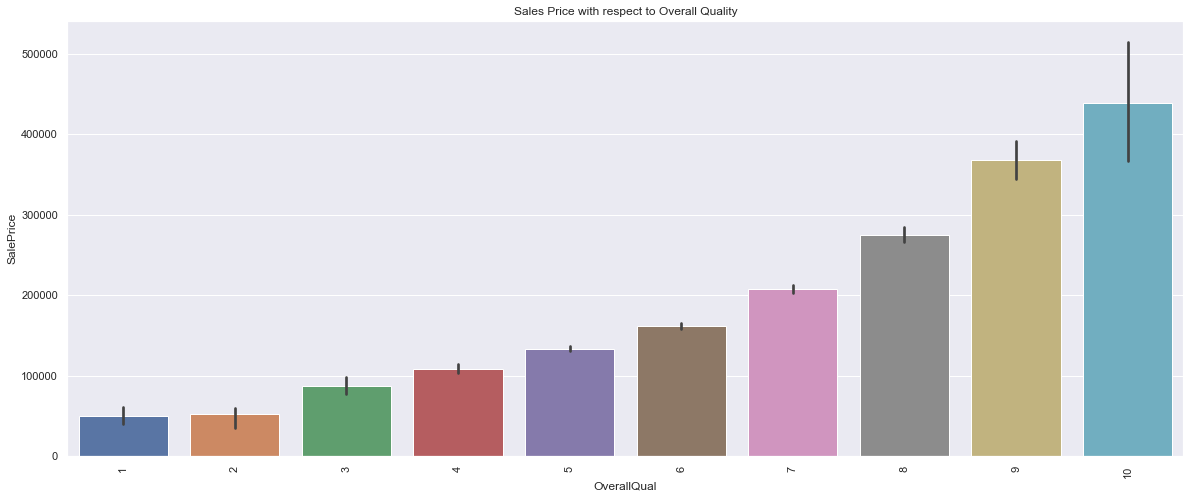

In [22]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= hd)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

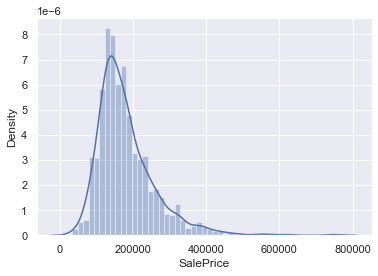

In [23]:
sns.distplot(hd['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

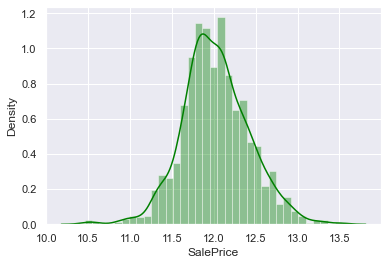

In [24]:
#Saleprice figures are skewed towards left, applying the log transformation to get a centralized data
#Log Transformation
hd['SalePrice']=np.log1p(hd['SalePrice'])
sns.distplot(hd['SalePrice'], color='green')

In [25]:
hd.shape

(1460, 72)

## Handling the Outliers

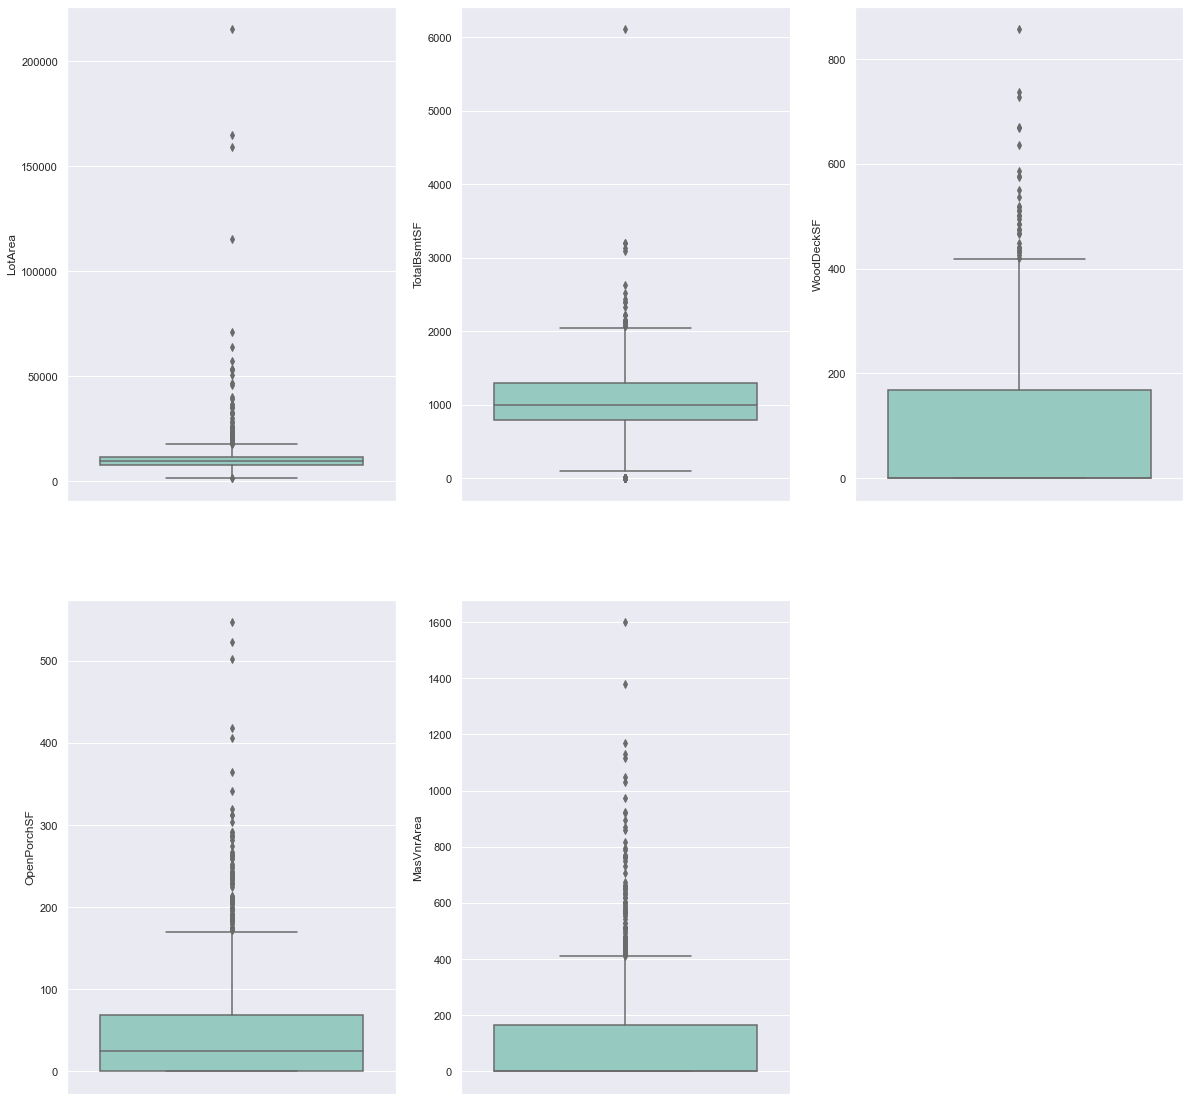

In [26]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = hd)
plt.subplot(2,3,2)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = hd)
plt.subplot(2,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = hd)
plt.subplot(2,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = hd)
plt.subplot(2,3,5)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = hd)
plt.show()

In [27]:
num_col = list(hd.dtypes[hd.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(hd)

In [28]:
hd.shape

(1460, 72)

In [29]:
hd[list(hd.dtypes[hd.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Checking the few columns if they are Ordinal as could see order in it 

In [30]:
hd[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [31]:
#get_nan_vals(dataframe=hd)

#### Converting the columns 

In [32]:
#Converting all the similar terms columns i.e. Quality & Condition columns
#convert ExterCond 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['ExterCond'] = hd.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#convert ExterQual 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['ExterQual'] = hd.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#convert BsmtQual 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['BsmtQual'] = hd.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#convert BsmtCond 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['BsmtCond'] = hd.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#convert GarageQual 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['GarageQual'] = hd.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#convert GarageCond 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['GarageCond'] = hd.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#convert KitchenQual Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4
hd['KitchenQual'] = hd.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#convert HeatingQC 'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5
hd['HeatingQC'] = hd.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


In [33]:
#Converting all the Remaning different terms columns 
#convert BsmtExposure->'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4
hd['BsmtExposure'] = hd.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
#convert LandSlope->'Gtl':0,'Mod':1,'Sev':2
hd['LandSlope'] = hd.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
#convert BsmtFinType1->NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6
hd['BsmtFinType1'] = hd.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
#convert BsmtFinType2->NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6
hd['BsmtFinType2'] = hd.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
#convert CentralAir'N':0,'Y':1
hd['CentralAir'] = hd.CentralAir.map({'N':0,'Y':1})
#convert GarageFinish->'NA':0,'Unf':1,'RFn':2,'Fin':3
hd['GarageFinish'] = hd.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
#convert LotShape->'IR1':0,'IR2':1,'IR3':2,'Reg':3
hd['LotShape'] = hd.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})


### we will check the changes 

In [34]:
hd[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [35]:
dummyCol = pd.get_dummies(hd[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']], drop_first = True)

In [36]:
hd = pd.concat([hd,dummyCol], axis='columns')

In [37]:
hd = hd.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis='columns')

In [38]:
hd.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,0,8,5,350.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0


In [39]:
hd.shape

(1460, 196)

### Plotting the target varaibale before Scaling 

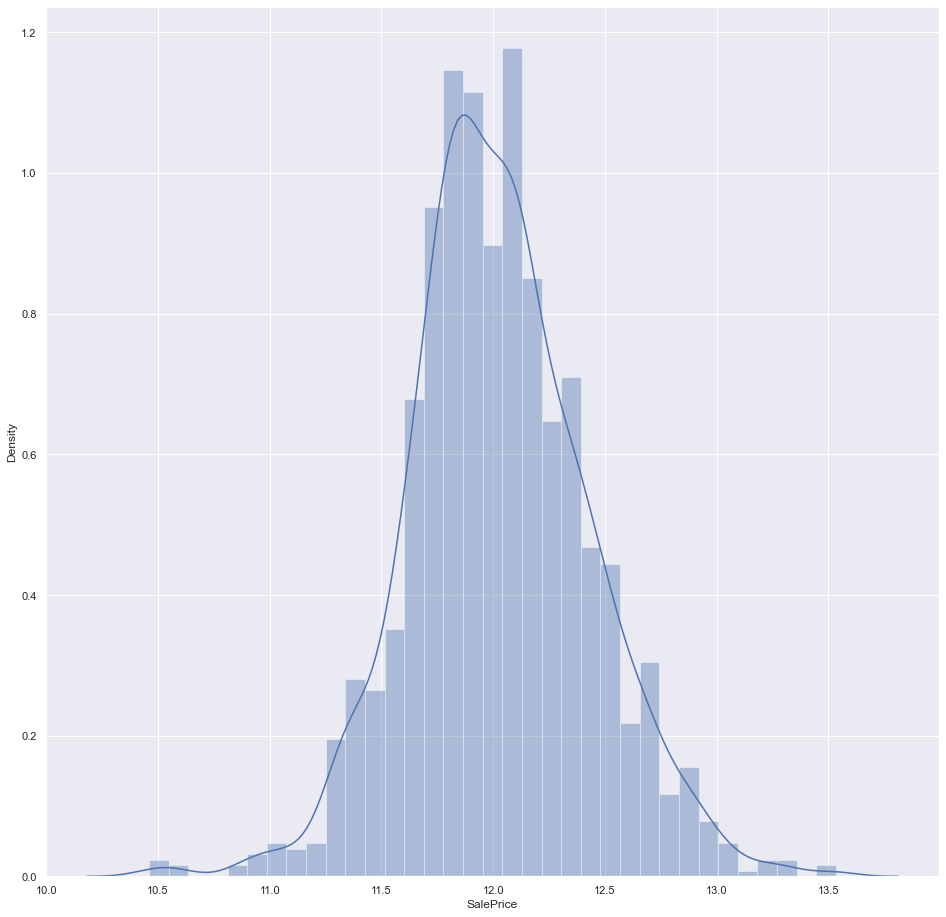

In [40]:
plt.figure(figsize=(16,16))
sns.distplot(hd.SalePrice)
plt.show()

## Splitting the data into TRAIN & TEST

In [41]:
df_train,df_test = train_test_split(hd,train_size=0.7,test_size=0.3,random_state=42)

In [42]:
print(len(df_train))
print(len(df_test))

1021
438


In [43]:
hd[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']]

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,2,4,3,1,1,1,4,1,2,2,3,3,2,3
1456,0,2,4,3,1,5,3,2,1,2,1,3,3,2,3
1457,0,4,3,4,1,6,1,4,1,3,2,3,3,3,3
1458,0,2,3,3,2,6,3,3,1,3,1,3,3,2,3


#### Scaling Training set

##### Scale of the independent variable occurs to be different then the dependent varaible 
##### Therefore we have to scale the Dependent Variables to get it on the same scale 

In [44]:
numeriCol = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

In [45]:
scaler = StandardScaler()
df_train[numeriCol] = scaler.fit_transform(df_train[numeriCol])
df_test[numeriCol] = scaler.transform(df_test[numeriCol]) 

### Checking the effect of scaling on the Independent variable 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

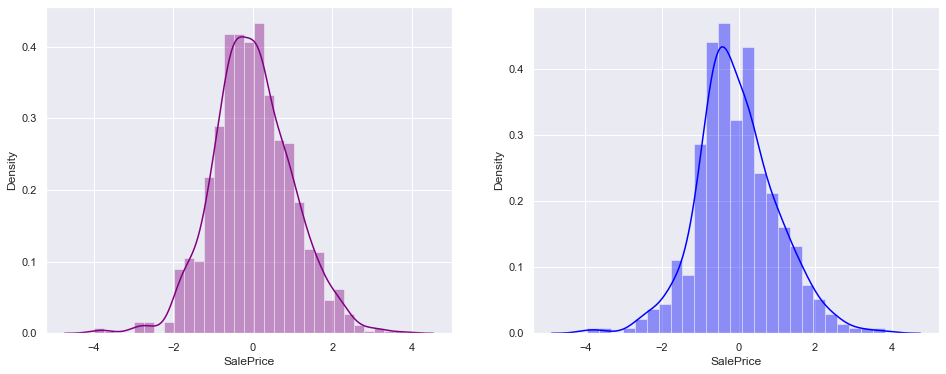

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice,color='purple')
plt.subplot(122)
sns.distplot(df_test.SalePrice, color='blue')

### Splitting the dependent & independent vars

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [48]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [49]:
# Checking the shape of the train and test data 
print(df_train.shape)
print(df_test.shape)

(1021, 195)
(438, 195)


In [50]:
X_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,3,0,0.636468,0.391626,1.059818,2,2,3,...,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,3,0,-0.822194,-0.508937,-0.146314,2,2,4,...,0,0,0,0,1,0,0,0,1,0
762,0.070429,-0.186479,3,0,0.636468,-0.508937,-0.610211,2,2,4,...,0,0,0,0,0,0,0,0,1,0
932,-0.868006,0.081010,0,0,2.095130,-0.508937,1.141000,4,2,5,...,0,0,0,0,1,0,0,0,1,0
435,0.070429,-0.007535,1,0,0.636468,0.391626,-0.610211,3,2,4,...,0,1,0,0,0,0,0,0,1,0


In [51]:
X_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.868006,-0.206430,3,0,-0.092863,2.192751,-0.610211,2,2,3,...,0,0,0,0,1,0,0,0,1,0
1105,0.070429,0.132742,0,0,1.365799,-0.508937,1.488923,3,2,5,...,0,0,0,0,1,0,0,0,1,0
413,-0.633397,-0.158229,3,0,-0.822194,0.391626,-0.610211,2,2,3,...,0,0,0,0,1,0,0,0,1,0
522,-0.164180,-0.507818,3,0,-0.092863,1.292189,-0.610211,2,3,3,...,0,0,0,0,1,0,0,0,1,0
1036,-0.868006,0.189418,0,0,2.095130,-0.508937,-0.204301,3,2,5,...,0,0,0,0,1,0,0,0,1,0


In [52]:
len(X_train.columns)

195

## Running RFE

In [53]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select = 70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [54]:
#Checking the rank on Train data set
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 39),
 ('LotArea', False, 18),
 ('LotShape', False, 113),
 ('LandSlope', False, 85),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 105),
 ('ExterQual', False, 117),
 ('ExterCond', False, 15),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 104),
 ('BsmtExposure', False, 50),
 ('BsmtFinType1', False, 78),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 110),
 ('BsmtFinSF2', False, 91),
 ('BsmtUnfSF', False, 112),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 37),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 114),
 ('FullBath', False, 29),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 68),
 ('KitchenAbvGr', False, 17),
 ('KitchenQual', False, 10),
 ('TotRmsAbvGrd', False, 24),
 ('Fireplaces', False, 9),
 ('GarageFinish', False, 73),
 ('GarageCars', False, 84),
 ('GarageArea', True, 1),
 ('Gara

In [55]:
# Select the top 70 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Wd Sdng',
       'Found

In [56]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Electrical_SBrkr', 'Functional_Min1', 'Functional_Min2',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family'],
      dtype='object', length=125)

In [57]:
# Create X_test df with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
X_train_rfe = pd.DataFrame(X_train[col])

In [59]:
X_train_rfe.head(10)

,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
135,0.636468,0.391626,3,-0.971407,0.546680,1,1.316609,-0.802940,-0.120373,0.287742,...,0,0,0,0,0,0,0,0,1,0
1452,-0.822194,-0.508937,4,0.218347,-1.145636,1,-0.250050,-0.802940,-0.120373,-0.861096,...,0,0,0,0,0,0,0,0,1,0
762,0.636468,-0.508937,4,-0.919206,-0.678405,1,-1.041084,0.972627,-0.120373,0.033491,...,0,0,0,1,0,0,0,0,1,0
932,2.095130,-0.508937,5,-0.971407,1.890249,1,1.889338,-0.802940,-0.120373,0.707727,...,0,0,0,0,0,0,0,0,1,0
435,0.636468,0.391626,4,-0.134012,-0.582276,1,-0.879282,1.088277,-0.120373,0.248192,...,0,0,0,0,0,0,0,0,1,0
629,-0.092863,-0.508937,3,0.385826,0.421489,1,0.463935,-0.802940,-0.120373,-0.337528,...,0,0,0,0,0,0,0,0,1,0
1210,-0.092863,-0.508937,4,-0.971407,-0.009974,1,-0.293711,0.988501,-0.120373,0.594726,...,0,0,0,0,0,0,0,0,1,0
1118,-0.822194,0.391626,3,-0.971407,-1.176934,1,-0.381033,0.512295,-0.120373,0.135191,...,0,0,0,0,0,0,0,0,1,0
1084,-0.092863,-0.508937,4,0.316224,-0.823716,1,-1.228570,1.027051,-0.120373,-0.058793,...,0,0,0,0,0,0,0,0,1,0
158,0.636468,-0.508937,4,-0.488545,-0.153049,1,-0.458082,1.364930,-0.120373,0.786827,...,0,0,0,0,0,0,0,0,1,0


In [60]:
X_train_rfe.shape

(1021, 70)

In [61]:
# prediction on Train data set
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9410886094848168

In [62]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8200927453368871

In [63]:
#Checking the rank on Test Data set
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 39),
 ('LotArea', False, 18),
 ('LotShape', False, 113),
 ('LandSlope', False, 85),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 105),
 ('ExterQual', False, 117),
 ('ExterCond', False, 15),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 104),
 ('BsmtExposure', False, 50),
 ('BsmtFinType1', False, 78),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 110),
 ('BsmtFinSF2', False, 91),
 ('BsmtUnfSF', False, 112),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 37),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 114),
 ('FullBath', False, 29),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 68),
 ('KitchenAbvGr', False, 17),
 ('KitchenQual', False, 10),
 ('TotRmsAbvGrd', False, 24),
 ('Fireplaces', False, 9),
 ('GarageFinish', False, 73),
 ('GarageCars', False, 84),
 ('GarageArea', True, 1),
 ('Gara

In [64]:
# Select the top vars
COL = X_test.columns[rfe.support_]
COL

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Wd Sdng',
       'Found

In [65]:
X_test_rfe = X_test[COL]

In [66]:
X_test_rfe.head(10)

,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
892,-0.092863,2.192751,3,0.470653,-0.001031,1,-0.260323,-0.802940,-0.120373,-0.868630,...,0,0,0,0,0,0,0,0,1,0
1105,1.365799,-0.508937,5,1.273247,0.902134,1,0.849179,1.741359,-0.120373,2.058083,...,0,0,0,0,0,0,0,0,1,0
413,-0.822194,0.391626,3,-0.971407,-0.115045,1,-0.363055,-0.802940,-0.120373,-0.943964,...,0,1,0,0,0,0,0,0,1,0
522,-0.092863,1.292189,3,-0.103561,-0.123987,1,-0.424694,0.693707,-0.120373,0.253842,...,0,1,0,0,0,0,0,0,1,0
1036,2.095130,-0.508937,5,1.251497,1.253116,1,1.157374,-0.802940,-0.120373,0.170975,...,0,0,0,0,0,0,0,0,1,0
614,-1.551525,0.391626,4,-0.645149,-0.960085,1,-1.385236,-0.802940,-0.120373,-1.693533,...,0,0,0,0,0,0,0,0,1,0
218,0.636468,3.093314,3,-0.229714,-0.584512,1,-0.083111,1.049727,-0.120373,0.800011,...,0,0,0,0,0,0,0,0,1,0
1160,-0.092863,-0.508937,4,-0.294966,-0.457085,1,-0.807370,0.559915,-0.120373,-0.137893,...,0,0,0,0,0,0,0,0,1,0
649,-1.551525,0.391626,4,-0.686475,-0.960085,1,-1.385236,-0.802940,-0.120373,-1.693533,...,0,0,0,0,0,0,0,0,1,0
887,-0.822194,1.292189,3,-0.971407,-0.544272,1,-0.763709,0.378504,-0.120373,-0.256544,...,0,0,0,0,0,0,0,0,1,0


# Lasso and Ridge Regression

In [67]:
#dimension of X_train 
X_train.shape

(1021, 195)

In [68]:
#dimension of y_train
y_train.shape

(1021,)

In [69]:
# Lasso Regression
lasso = Lasso()
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
#Calculating cv result Lasso
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073781,0.010629,0.003790,0.000977,0.0001,{'alpha': 0.0001},-0.213919,-0.291529,-0.239955,-0.224836,...,-0.239699,0.027214,1,-0.173782,-0.158235,-0.160263,-0.174268,-0.174114,-0.168132,0.007283
1,0.040349,0.007143,0.003192,0.000399,0.0010,{'alpha': 0.001},-0.233003,-0.270578,-0.249591,-0.244571,...,-0.246090,0.013889,2,-0.204221,-0.173045,-0.196957,-0.204027,-0.202549,-0.196160,0.011854
2,0.015648,0.004610,0.005180,0.002035,0.0100,{'alpha': 0.01},-0.244728,-0.289103,-0.264606,-0.258092,...,-0.258987,0.017699,3,-0.240066,-0.205986,-0.236596,-0.245938,-0.241670,-0.234051,0.014350
3,0.016555,0.002150,0.008179,0.001324,0.0500,{'alpha': 0.05},-0.262351,-0.321987,-0.291783,-0.287703,...,-0.281832,0.026296,4,-0.276158,-0.234464,-0.275071,-0.281606,-0.280396,-0.269539,0.017710
4,0.014165,0.001594,0.004586,0.001018,0.1000,{'alpha': 0.1},-0.288540,-0.367677,-0.333617,-0.329169,...,-0.318091,0.034267,5,-0.314689,-0.277123,-0.312475,-0.317030,-0.318520,-0.307967,0.015559


In [71]:
#Calculating the CV result for ridge
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073781,0.010629,0.003790,0.000977,0.0001,{'alpha': 0.0001},-0.213919,-0.291529,-0.239955,-0.224836,...,-0.239699,0.027214,1,-0.173782,-0.158235,-0.160263,-0.174268,-0.174114,-0.168132,0.007283
1,0.040349,0.007143,0.003192,0.000399,0.0010,{'alpha': 0.001},-0.233003,-0.270578,-0.249591,-0.244571,...,-0.246090,0.013889,2,-0.204221,-0.173045,-0.196957,-0.204027,-0.202549,-0.196160,0.011854
2,0.015648,0.004610,0.005180,0.002035,0.0100,{'alpha': 0.01},-0.244728,-0.289103,-0.264606,-0.258092,...,-0.258987,0.017699,3,-0.240066,-0.205986,-0.236596,-0.245938,-0.241670,-0.234051,0.014350
3,0.016555,0.002150,0.008179,0.001324,0.0500,{'alpha': 0.05},-0.262351,-0.321987,-0.291783,-0.287703,...,-0.281832,0.026296,4,-0.276158,-0.234464,-0.275071,-0.281606,-0.280396,-0.269539,0.017710
4,0.014165,0.001594,0.004586,0.001018,0.1000,{'alpha': 0.1},-0.288540,-0.367677,-0.333617,-0.329169,...,-0.318091,0.034267,5,-0.314689,-0.277123,-0.312475,-0.317030,-0.318520,-0.307967,0.015559


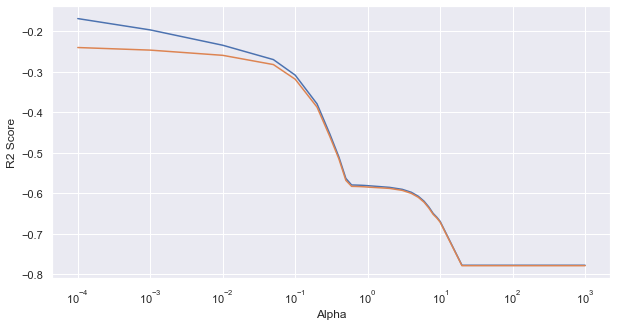

In [72]:
#Plotting the Lasso Regression
plt.figure(figsize=(10,5))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [73]:
model_cv.best_params_

{'alpha': 0.0001}

In [74]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.912706564599264
0.898821020594302


In [75]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [76]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
83,Neighborhood_Timber,0.353461
77,Neighborhood_OldTown,0.280991
67,Neighborhood_Edwards,0.272567
126,Exterior1st_CBlock,0.233276
24,BsmtFullBath,0.231092
5,OverallCond,0.210987
192,SaleCondition_Family,0.204503
101,BldgType_Duplex,0.176049
76,Neighborhood_NridgHt,0.164015
55,LandContour_Low,0.163209


# Ridge Regression

In [77]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9410852048861579
0.8229244127092402


In [78]:
#Ridge regression
ridge = Ridge()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

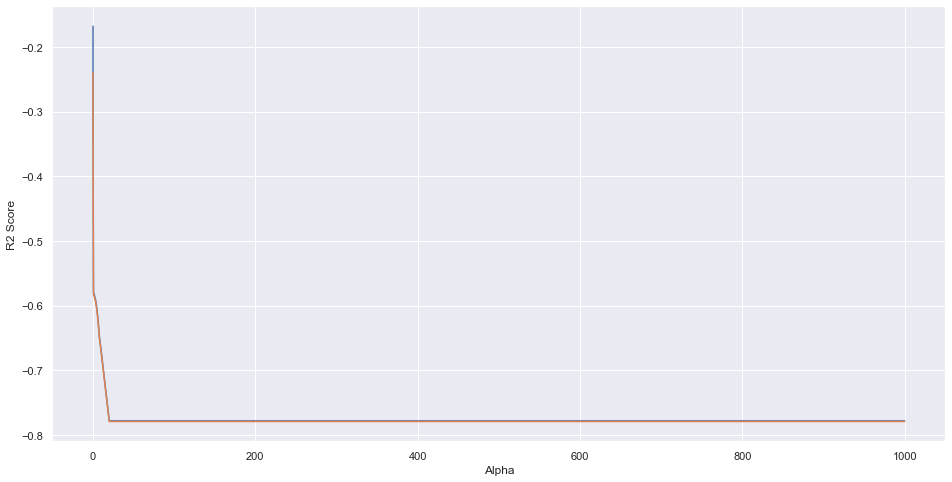

In [79]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [80]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.01}

In [81]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.924846097686411
0.8983551430230018


In [82]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [83]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
123,Exterior1st_AsphShn,0.691411
117,RoofMatl_Membran,0.615088
51,MSZoning_RH,0.443455
121,RoofMatl_WdShake,0.439597
122,RoofMatl_WdShngl,0.424570
192,SaleCondition_Family,0.416064
83,Neighborhood_Timber,0.379019
53,MSZoning_RM,0.370505
52,MSZoning_RL,0.362065
120,RoofMatl_Tar&Grv,0.317836


# Final Model

In [84]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.912706564599264
0.898821020594302


## Question1

In [85]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7279769586842377
0.737389249853518


In [86]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [87]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
0,MSSubClass,0.597247
24,BsmtFullBath,0.263664
5,OverallCond,0.145669
33,GarageFinish,0.030855
36,GarageQual,0.010713
13,BsmtFinSF1,0.006185
49,YrSold_Old,0.004724
35,GarageArea,0.003848
135,Exterior1st_Wd Sdng,-0.000000
129,Exterior1st_ImStucc,-0.000000


In [88]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8989332409733668
0.893361659537921


In [89]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']


In [90]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
5,OverallCond,0.208256
24,BsmtFullBath,0.118135
35,GarageArea,0.110407
67,Neighborhood_Edwards,0.109951
126,Exterior1st_CBlock,0.101387
6,MasVnrArea,0.098229
87,Condition1_PosA,0.097895
83,Neighborhood_Timber,0.091219
10,BsmtCond,0.091039
175,GarageType_Attchd,0.089604


## Question3: Drop the Top 5 features and rebuild lasso

In [91]:
#Drop top 5 features
X_train = X_train.drop(['OverallCond','BsmtFullBath','GarageArea','Neighborhood_Edwards','Exterior1st_CBlock'], axis=1)

In [92]:
#Drop top 5 features
X_test = X_test.drop(['OverallCond','BsmtFullBath','GarageArea','Neighborhood_Edwards','Exterior1st_CBlock'], axis=1)

In [93]:
# Lasso Regression
lasso = Lasso()
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [95]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.4512899344632686
0.46012790202746257


In [96]:
X_train_rfe.columns

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Wd Sdng',
       'Found

In [98]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
0,MSSubClass,0.597247
24,BsmtFullBath,0.263664
5,OverallCond,0.145669
33,GarageFinish,0.030855
36,GarageQual,0.010713
13,BsmtFinSF1,0.006185
49,YrSold_Old,0.004724
35,GarageArea,0.003848
135,Exterior1st_Wd Sdng,-0.000000
129,Exterior1st_ImStucc,-0.000000


In [97]:
# Best alpha value for Lasso Regression is when alpha = 0.001

# Best alpha value for Ridge Regression is when alpha = 0.9

## Conclusion

We got a decent score for both Ridge and Lasso regression.

Ridge : Train :0.92 Test :0.89

Lasso : Train :0.91 Test :0.89

### Top 5 most significant variables in Ridge are:

Exterior1st_AsphShn

RoofMatl_Membran

MSZoning_RH

RoofMatl_WdShake

RoofMatl_WdShngl

### Top 5 most significant variables in Lasso are:

Neighborhood_Timber

Neighborhood_OldTown	

Neighborhood_Edwards	

Exterior1st_CBlock	

BsmtFullBath